In [1]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt ; plt.ion()

# SDE SOLVER

In [9]:
class Simulations:
    def __init__(self , h , x0 , y0 , z0 , n , auto = False) -> None:
        self.h = h
        self.x0 = x0
        self.y0 = y0
        self.z0 = z0
        self.n = n
        if auto == True:
            self.result_A = self.method_A()
            self.result_B = self.method_B()
            self.result_C = self.method_C()
    def drift_x(self , x , y , z):
        return 10 * (y - x)
    
    def drift_y(self , x , y , z):
        return x * (28 - z) - y
    
    def drift_z(self , x , y , z):
        return x * y - 8 * z / 3
    
    def d_drift_x(self , x , y , z):
        return -10
    
    def d_drift_y(self , x , y , z):
        return -1
    
    def d_drift_z(self , x , y , z):
        return -8 / 3
    
    def method_A(self , last=False):
        Xpath_A = [self.x0]
        Ypath_A = [self.y0]
        Zpath_A = [self.z0]
        for i in range(self.n):
            xi_x , xi_y , xi_z = np.random.choice([-1 , 1] , 3)
            x , y ,z = Xpath_A[-1] , Ypath_A[-1] , Zpath_A[-1]
            Xpath_A.append(x + self.h * self.drift_x(x,y,z) + self.h ** .5 * xi_x)
            Ypath_A.append(y + self.h * self.drift_y(x,y,z) + self.h ** .5 * xi_y)
            Zpath_A.append(z + self.h * self.drift_z(x,y,z) + self.h ** .5 * xi_z)

        if last: 
            return np.array([Xpath_A[-1] , Ypath_A[-1] , Zpath_A[-1]])
        return Xpath_A , Ypath_A , Zpath_A
    
    def method_B(self , last=False):
        Xpath_B = [self.x0]
        Ypath_B = [self.y0]
        Zpath_B = [self.z0]
        xi_x , xi_y , xi_z = np.random.choice([(3*self.h)**.5 , -(3*self.h)**.5 , 0] , size=3 , p=[1/6 , 1/6 , 2/3])
        for i in range(self.n):
            xi_x , xi_y , xi_z = np.random.choice([-1 , 1] , 3)
            x , y ,z = Xpath_B[-1] , Ypath_B[-1] , Zpath_B[-1]
            Xpath_B.append(x + self.h * self.drift_x(x,y,z) + xi_x + self.h * .5 * xi_x * self.d_drift_x(x,y,z) + .5 * self.drift_x(x,y,z) * self.d_drift_x(x,y,z) * self.h ** 2)
            Ypath_B.append(y + self.h * self.drift_y(x,y,z) + xi_y + self.h * .5 * xi_y * self.d_drift_y(x,y,z) + .5 * self.drift_y(x,y,z) * self.d_drift_y(x,y,z) * self.h ** 2)
            Zpath_B.append(z + self.h * self.drift_z(x,y,z) + xi_z + self.h * .5 * xi_z * self.d_drift_z(x,y,z) + .5 * self.drift_z(x,y,z) * self.d_drift_z(x,y,z) * self.h ** 2)
        if last: 
            return np.array([Xpath_B[-1] , Ypath_B[-1] , Zpath_B[-1]])
        return Xpath_B , Ypath_B , Zpath_B
    
    def method_C(self , last=False):
        Xpath_C = [self.x0]
        Ypath_C = [self.y0]
        Zpath_C = [self.z0]


        for i in range(self.n):
            xi_x , xi_y , xi_z= np.random.normal(loc = 0 , scale=1  , size=3)
            x , y , z = Xpath_C[-1] , Ypath_C[-1] , Zpath_C[-1]
            sx = x + self.h * self.drift_x(x,y,z) + xi_x
            sy = y + self.h * self.drift_y(x,y,z) + xi_y
            sz = z + self.h * self.drift_z(x,y,z) + xi_z
            Xpath_C.append(x + .5 * self.h * (self.drift_x(x,y,z) + self.drift_x(sx,y,z)) + xi_x)
            Ypath_C.append(y + .5 * self.h * (self.drift_y(x,y,z) + self.drift_y(x,sy,z)) + xi_y)
            Zpath_C.append(z + .5 * self.h * (self.drift_z(x,y,z) + self.drift_z(x,y,sz)) + xi_z)
        if last: 
            return np.array([Xpath_C[-1] , Ypath_C[-1] , Zpath_C[-1]])
        return Xpath_C , Ypath_C , Zpath_C



## Plot of paths

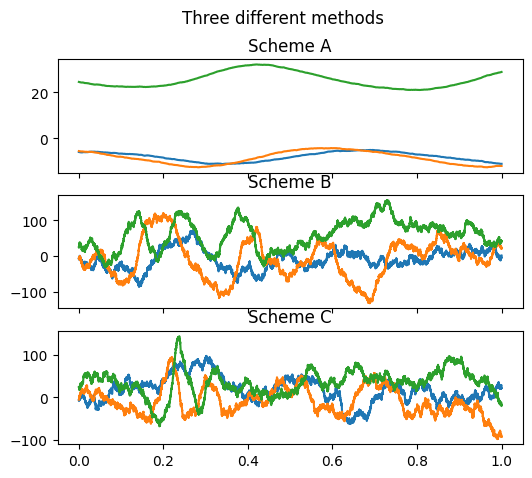

<Figure size 640x480 with 0 Axes>

In [16]:
n = int(2e4)
h = 1  / n
x0 = -5.91652
y0 = -5.52332   
z0 = 24.57231
simulations = Simulations(h , x0 , y0 , z0 , n , True)
Xpath_A , Ypath_A , Zpath_A = simulations.result_A
Xpath_B , Ypath_B , Zpath_B = simulations.result_B
Xpath_C , Ypath_C , Zpath_C = simulations.result_C
Ts = np.linspace(0 , 1  , n + 1)
fig, (ax1, ax2 , ax3) = plt.subplots(3, 1 , sharex=True , figsize = (6,5))
ax1.title.set_text('Scheme A')
ax2.title.set_text('Scheme B')
ax3.title.set_text('Scheme C')
fig.suptitle('Three different methods')
ax1.plot( Ts, Xpath_A , label = 'Path X')
ax1.plot(Ts , Ypath_A , label = 'Path Y')
ax1.plot(Ts , Zpath_A , label = 'Path Z')
ax2.plot(Ts , Xpath_B , label = 'Path X')
ax2.plot(Ts , Ypath_B , label = 'Path Y')
ax2.plot(Ts , Zpath_B , label = 'Path Z')
ax3.plot(Ts , Xpath_C , label = 'Path X')
ax3.plot(Ts , Ypath_C , label = 'Path Y')
ax3.plot(Ts , Zpath_C , label = 'Path Z')
plt.show()
plt.savefig('Plots of different schemes.png')

# Estimation of p

In [50]:
sdes = Simulations(h , x0 , y0 , z0 , n)
hs = np.linspace(1e-4 , .8e-3 , 5)
err_mat = []
true_expectations = np.zeros((3,3))
for i in range(100):
    tv = np.array([simulations.method_A(last=True) , simulations.method_B(last=True) , simulations.method_C(last=True)])
    true_expectations += tv
true_expectations /= 100
for h in hs:
    sdes.h = h
    sdes.n = int(1 // h)
    approx = np.zeros((3,3))
    true_expectations = np.zeros((3,3))
    for i in range(100):
        a = sdes.method_A(last=True)
        b = sdes.method_B(last=True)
        c = sdes.method_C(last=True)
        approx += np.array([a , b , c])
    approx /= 100
    errors = abs(approx - true_expectations)
    err_mat.append(errors)


    


    

In [56]:
err_mat = np.array(err_mat)
some_dict = {0:"A" , 1:'B' , 2:'C'}
another_dict = {0:"X" , 1:'Y' , 2:'Z'}

for i in range(3):
    for j in range(3):
        print(f'Scheme{some_dict[i]},{another_dict[j]} has p value: {abs(linregress(np.log(hs) , np.log(err_mat[:,i,j]))[0])}')

SchemeA,X has p value: 0.004305943107070148
SchemeA,Y has p value: 0.010999903245666678
SchemeA,Z has p value: 0.0017948081654634795
SchemeB,X has p value: 0.7957019340830467
SchemeB,Y has p value: 0.9564056722960125
SchemeB,Z has p value: 0.20898522627485508
SchemeC,X has p value: 2.667589398989237
SchemeC,Y has p value: 0.29841236587428793
SchemeC,Z has p value: 0.21712971656554353
